<a href="https://colab.research.google.com/github/MGrgat1/deep_learning_in_google_colab/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cuda")


Training for sin(x)

Entering training:
Iteration: 0, loss:  57434.28125, loss_delta: -57434.28125


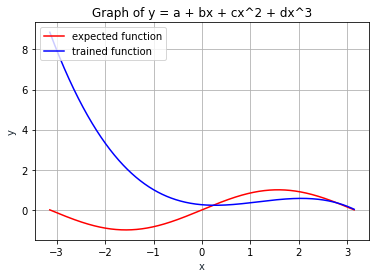

Iteration: 1000, loss:  27.838226318359375, loss_delta: 0.07823753356933594


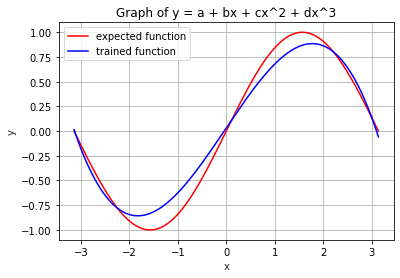

Iteration: 2000, loss:  9.134814262390137, loss_delta: 0.0012979507446289062


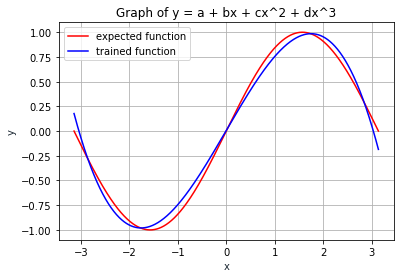

Iteration: 3000, loss:  8.822674751281738, loss_delta: 2.193450927734375e-05


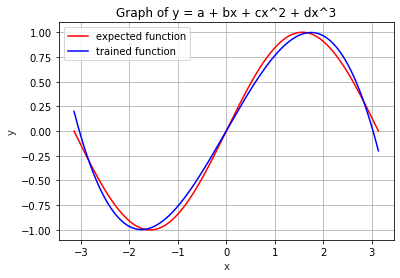

Training has reached the local minimum
Training finished after 3727 iterations
Current loss:8.81746768951416
Total stagnation:31
Parameters: 
Learning rate: 1e-06,  
Result: y = 0.0002815259504131973 + 0.8562741279602051 x + -4.8567944759270176e-05 x^2 + -0.09326400607824326 x^3
Losses:


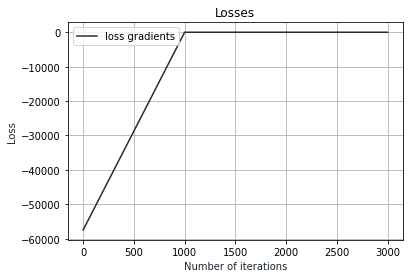

In [51]:
# set up the neural network that will approximate the function

# Every x in the polynomial (x, x^2, x^3) is its own function
# unsqueeze maps from (2000) to (2000, 1)
# pow uses all x parameters as powers for the tensor p
p = torch.tensor([1, 2, 3], device=device)
xx = x.unsqueeze(-1).pow(p)

# a simple linear sequential model
# input - 3, output - 1
# Flatten maps the output to a 1D vector
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
).cuda()

# mean square error with error summation
loss_fn = torch.nn.MSELoss(reduction='sum').cuda()

learning_rate = 1e-6

number_of_iterations = 100001

#SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#set up loss statistics
t_samples = []
loss_samples = []
loss_gradient_samples = []
previous_loss = 0
current_loss = 0
loss_delta = 0
max_stagnant_loss_rate = 0.00001    # if the losses fall below this rate, we've probably reached the local minimum
stagnation_counter = 0
total_stagnation = 0
accepted_number_of_stagnation = 500

# the function to approximate
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y_expected = torch.sin(x)

# the training loop
print("Entering training:")
for t in range(number_of_iterations):
    # forward propagation
    # y = a + b x + c x^2 + d x^3
    y_pred = model(xx)

    # calculate the error using a built-in error function
    loss = loss_fn(y_pred, y_expected)

    # determine the rate at which the losses are changing
    current_loss = loss.item()
    loss_delta = previous_loss - current_loss
    previous_loss = current_loss
    if t % 1000 == 0:
        t_samples.append(t)
        loss_samples.append(current_loss)
        loss_gradient_samples.append(loss_delta)
        print(f'Iteration: {t}, loss:  {current_loss}, loss_delta: {loss_delta}')

    # if the rate of change of losses is below a certain level (max_stagnant_loss_rate), we've probably reached the local minimum
    if abs(loss_delta) < max_stagnant_loss_rate:
      stagnation_counter += 1
    else:
      total_stagnation += stagnation_counter
      stagnation_counter = 0

    if stagnation_counter > accepted_number_of_stagnation:
      print(f"Training has reached the local minimum")
      break

    # reset the gradient using the optimizer
    optimizer.zero_grad()

    # backpropagation
    # calculates the gradient with respect to all three parameters of the model
    # all parameters within the model are tensors with the property requires_grad=True
    loss.backward()

    # update the parameters using the optimizer
    optimizer.step()

    # get the parameters
    linear_layer = model[0]

    a = linear_layer.bias.item()
    b = linear_layer.weight[:, 0].item()
    c = linear_layer.weight[:, 1].item()
    d = linear_layer.weight[:, 2].item()

    # display the learning process
    if t % 1000 == 0:
        y_graph = a + b * x + c * x ** 2 + d * x ** 3
        plt.plot(x.cpu().detach(), y_expected.cpu().detach(), '-r', label='expected function', color = "red") 
        plt.plot(x.cpu().detach(), y_graph.cpu().detach(), '-r', label='trained function', color ="blue")
        plt.title('Graph of y = a + bx + cx^2 + dx^3')
        plt.xlabel('x', color='#1C2833')
        plt.ylabel('y', color='#1C2833')
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()

print(f"Training finished after {t} iterations")
print(f"Current loss:{current_loss}")
print(f"Total stagnation:{total_stagnation}")
print("Parameters: ")
print(f"Learning rate: {learning_rate},  ")

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

# a graph of the losses
# plt.plot(t_samples, loss_samples, '-r', label='losses')
plt.plot(t_samples, loss_gradient_samples, '-r', label='loss gradients', color="#232C33")
plt.title('Losses')
plt.xlabel('Number of iterations', color='#1C2833')
plt.ylabel('Loss', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
print("Losses:")
plt.show()

Training for sin(x)*exp(x)

Entering training:
Iteration: 0, loss:  13404.69921875, loss_delta: -13404.69921875


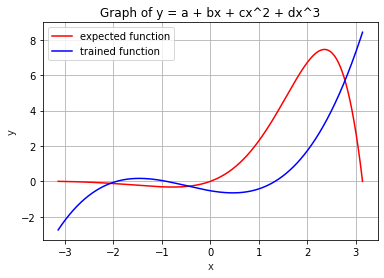

Iteration: 1000, loss:  2974.5849609375, loss_delta: 0.66259765625


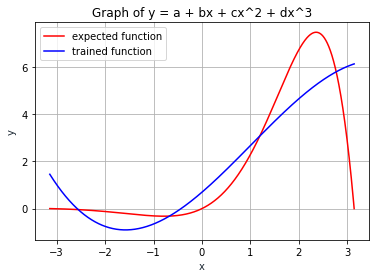

Iteration: 2000, loss:  2808.616943359375, loss_delta: 0.013916015625


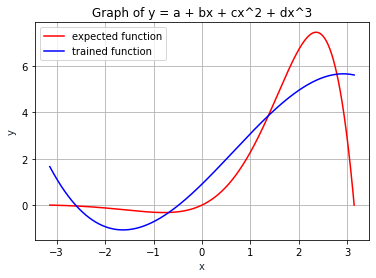

Iteration: 3000, loss:  2805.07177734375, loss_delta: 0.0


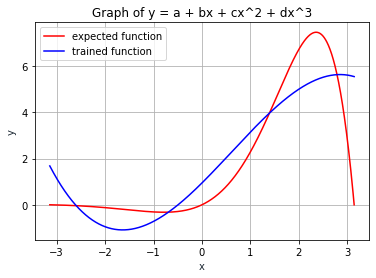

Iteration: 4000, loss:  2804.987060546875, loss_delta: -0.000244140625


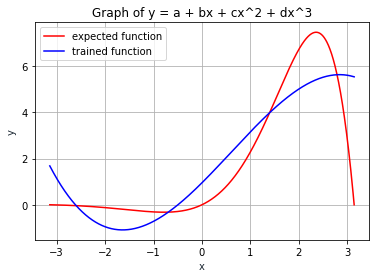

Iteration: 5000, loss:  2804.984375, loss_delta: 0.000244140625


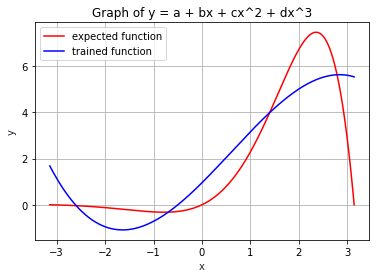

Iteration: 6000, loss:  2804.984619140625, loss_delta: 0.0


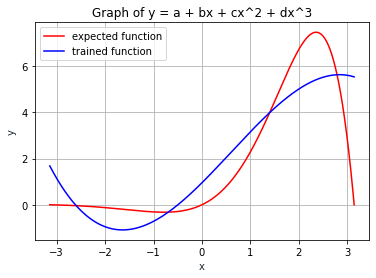

Training has reached the local minimum
Training finished after 6988 iterations
Current loss:2804.984619140625
Total stagnation:1831
Parameters: 
Learning rate: 1e-06,  
Result: y = 0.9516794681549072 + 2.0860400199890137 x + 0.26886942982673645 x^2 + -0.1492634117603302 x^3
Losses:


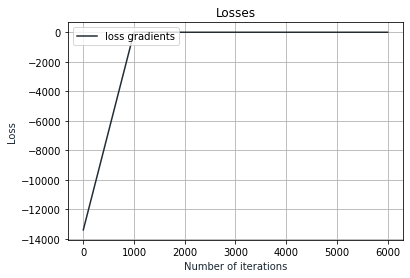

In [55]:
# set up the neural network that will approximate the function

# Every x in the polynomial (x, x^2, x^3) is its own function
# unsqueeze maps from (2000) to (2000, 1)
# pow uses all x parameters as powers for the tensor p
p = torch.tensor([1, 2, 3], device=device)
xx = x.unsqueeze(-1).pow(p)

# a simple linear sequential model
# input - 3, output - 1
# Flatten maps the output to a 1D vector
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
).cuda()

# mean square error with error summation
loss_fn = torch.nn.MSELoss(reduction='sum').cuda()

learning_rate = 1e-6

number_of_iterations = 100001

#SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#set up loss statistics
t_samples = []
loss_samples = []
loss_gradient_samples = []
previous_loss = 0
current_loss = 0
loss_delta = 0
max_stagnant_loss_rate = 0.00001    # if the losses fall below this rate, we've probably reached the local minimum
stagnation_counter = 0
total_stagnation = 0
accepted_number_of_stagnation = 500

# the function to approximate
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y_expected = torch.sin(x)*torch.exp(x)

# the training loop
print("Entering training:")
for t in range(number_of_iterations):
    # forward propagation
    # y = a + b x + c x^2 + d x^3
    y_pred = model(xx)

    # calculate the error using a built-in error function
    loss = loss_fn(y_pred, y_expected)

    # determine the rate at which the losses are changing
    current_loss = loss.item()
    loss_delta = previous_loss - current_loss
    previous_loss = current_loss
    if t % 1000 == 0:
        t_samples.append(t)
        loss_samples.append(current_loss)
        loss_gradient_samples.append(loss_delta)
        print(f'Iteration: {t}, loss:  {current_loss}, loss_delta: {loss_delta}')

    # if the rate of change of losses is below a certain level (max_stagnant_loss_rate), we've probably reached the local minimum
    if abs(loss_delta) < max_stagnant_loss_rate:
      stagnation_counter += 1
    else:
      total_stagnation += stagnation_counter
      stagnation_counter = 0

    if stagnation_counter > accepted_number_of_stagnation:
      print(f"Training has reached the local minimum")
      break

    # reset the gradient using the optimizer
    optimizer.zero_grad()

    # backpropagation
    # calculates the gradient with respect to all three parameters of the model
    # all parameters within the model are tensors with the property requires_grad=True
    loss.backward()

    # update the parameters using the optimizer
    optimizer.step()

    # get the parameters
    linear_layer = model[0]

    a = linear_layer.bias.item()
    b = linear_layer.weight[:, 0].item()
    c = linear_layer.weight[:, 1].item()
    d = linear_layer.weight[:, 2].item()

    # display the learning process
    if t % 1000 == 0:
        y_graph = a + b * x + c * x ** 2 + d * x ** 3
        plt.plot(x.cpu().detach(), y_expected.cpu().detach(), '-r', label='expected function', color = "red") 
        plt.plot(x.cpu().detach(), y_graph.cpu().detach(), '-r', label='trained function', color ="blue")
        plt.title('Graph of y = a + bx + cx^2 + dx^3')
        plt.xlabel('x', color='#1C2833')
        plt.ylabel('y', color='#1C2833')
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()

print(f"Training finished after {t} iterations")
print(f"Current loss:{current_loss}")
print(f"Total stagnation:{total_stagnation}")
print("Parameters: ")
print(f"Learning rate: {learning_rate},  ")

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

# a graph of the losses
# plt.plot(t_samples, loss_samples, '-r', label='losses')
plt.plot(t_samples, loss_gradient_samples, '-r', label='loss gradients', color="#232C33")
plt.title('Losses')
plt.xlabel('Number of iterations', color='#1C2833')
plt.ylabel('Loss', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
print("Losses:")
plt.show()

Training for cos(x)

Entering training:
Iteration: 0, loss:  41423.1796875, loss_delta: -41423.1796875


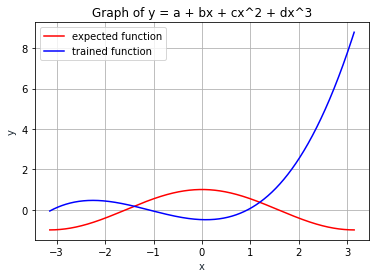

Iteration: 1000, loss:  126.62101745605469, loss_delta: 0.1744537353515625


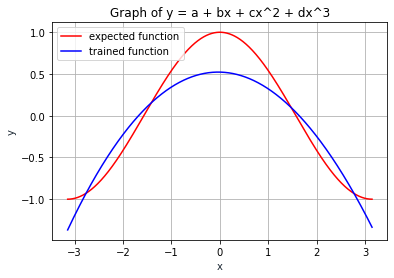

Iteration: 2000, loss:  77.87603759765625, loss_delta: 0.0054931640625


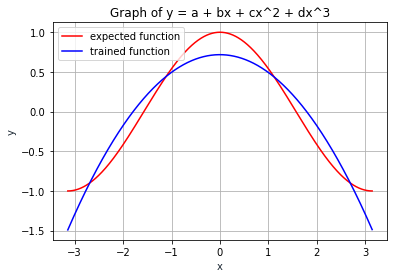

Iteration: 3000, loss:  76.34355926513672, loss_delta: 0.00017547607421875


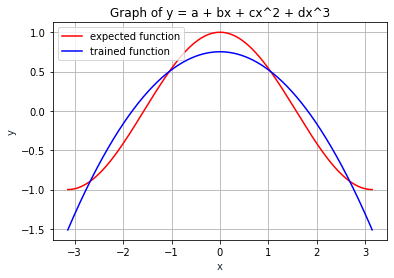

Iteration: 4000, loss:  76.29534912109375, loss_delta: -7.62939453125e-06


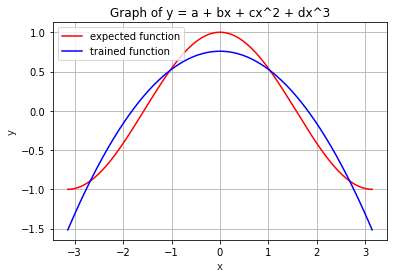

Iteration: 5000, loss:  76.2938232421875, loss_delta: 0.0


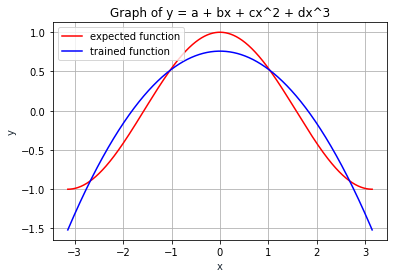

Iteration: 6000, loss:  76.29376983642578, loss_delta: 7.62939453125e-06


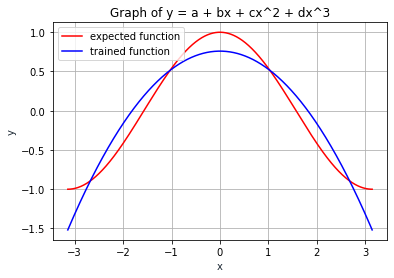

Training has reached the local minimum
Training finished after 6950 iterations
Current loss:76.29376983642578
Total stagnation:2193
Parameters: 
Learning rate: 1e-06,  
Result: y = 0.7595016956329346 + -5.780122691589895e-08 x + -0.23078416287899017 x^2 + 7.59742047051759e-09 x^3
Losses:


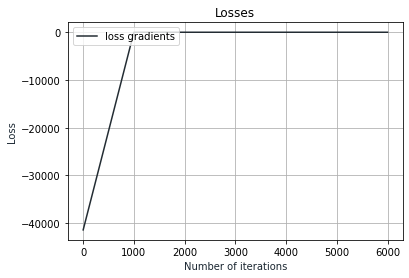

In [56]:
# set up the neural network that will approximate the function

# Every x in the polynomial (x, x^2, x^3) is its own function
# unsqueeze maps from (2000) to (2000, 1)
# pow uses all x parameters as powers for the tensor p
p = torch.tensor([1, 2, 3], device=device)
xx = x.unsqueeze(-1).pow(p)

# a simple linear sequential model
# input - 3, output - 1
# Flatten maps the output to a 1D vector
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
).cuda()

# mean square error with error summation
loss_fn = torch.nn.MSELoss(reduction='sum').cuda()

learning_rate = 1e-6

number_of_iterations = 100001

#SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#set up loss statistics
t_samples = []
loss_samples = []
loss_gradient_samples = []
previous_loss = 0
current_loss = 0
loss_delta = 0
max_stagnant_loss_rate = 0.00001    # if the losses fall below this rate, we've probably reached the local minimum
stagnation_counter = 0
total_stagnation = 0
accepted_number_of_stagnation = 500

# the function to approximate
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y_expected = torch.cos(x)

# the training loop
print("Entering training:")
for t in range(number_of_iterations):
    # forward propagation
    # y = a + b x + c x^2 + d x^3
    y_pred = model(xx)

    # calculate the error using a built-in error function
    loss = loss_fn(y_pred, y_expected)

    # determine the rate at which the losses are changing
    current_loss = loss.item()
    loss_delta = previous_loss - current_loss
    previous_loss = current_loss
    if t % 1000 == 0:
        t_samples.append(t)
        loss_samples.append(current_loss)
        loss_gradient_samples.append(loss_delta)
        print(f'Iteration: {t}, loss:  {current_loss}, loss_delta: {loss_delta}')

    # if the rate of change of losses is below a certain level (max_stagnant_loss_rate), we've probably reached the local minimum
    if abs(loss_delta) < max_stagnant_loss_rate:
      stagnation_counter += 1
    else:
      total_stagnation += stagnation_counter
      stagnation_counter = 0

    if stagnation_counter > accepted_number_of_stagnation:
      print(f"Training has reached the local minimum")
      break

    # reset the gradient using the optimizer
    optimizer.zero_grad()

    # backpropagation
    # calculates the gradient with respect to all three parameters of the model
    # all parameters within the model are tensors with the property requires_grad=True
    loss.backward()

    # update the parameters using the optimizer
    optimizer.step()

    # get the parameters
    linear_layer = model[0]

    a = linear_layer.bias.item()
    b = linear_layer.weight[:, 0].item()
    c = linear_layer.weight[:, 1].item()
    d = linear_layer.weight[:, 2].item()

    # display the learning process
    if t % 1000 == 0:
        y_graph = a + b * x + c * x ** 2 + d * x ** 3
        plt.plot(x.cpu().detach(), y_expected.cpu().detach(), '-r', label='expected function', color = "red") 
        plt.plot(x.cpu().detach(), y_graph.cpu().detach(), '-r', label='trained function', color ="blue")
        plt.title('Graph of y = a + bx + cx^2 + dx^3')
        plt.xlabel('x', color='#1C2833')
        plt.ylabel('y', color='#1C2833')
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()

print(f"Training finished after {t} iterations")
print(f"Current loss:{current_loss}")
print(f"Total stagnation:{total_stagnation}")
print("Parameters: ")
print(f"Learning rate: {learning_rate},  ")

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

# a graph of the losses
# plt.plot(t_samples, loss_samples, '-r', label='losses')
plt.plot(t_samples, loss_gradient_samples, '-r', label='loss gradients', color="#232C33")
plt.title('Losses')
plt.xlabel('Number of iterations', color='#1C2833')
plt.ylabel('Loss', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
print("Losses:")
plt.show()